In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import joblib

# Paths
NOTEBOOK_DIR = Path.cwd().resolve()
PROJECT_ROOT = NOTEBOOK_DIR.parent

DATA_PROCESSED_DIR = PROJECT_ROOT / "data" / "processed"
FIGURES_DIR = PROJECT_ROOT / "reports" / "figures"

FIGURES_DIR.mkdir(parents=True, exist_ok=True)

print("Project root:", PROJECT_ROOT)
print("Data files :", DATA_PROCESSED_DIR)
print("Figures    :", FIGURES_DIR)

Project root: D:\DS-Project\Demographic-Change_Understanding-Fertility-Through-Data
Data files : D:\DS-Project\Demographic-Change_Understanding-Fertility-Through-Data\data\processed
Figures    : D:\DS-Project\Demographic-Change_Understanding-Fertility-Through-Data\reports\figures


In [5]:
train_path = DATA_PROCESSED_DIR / "panel_country_split_train.csv"
test_path  = DATA_PROCESSED_DIR / "panel_country_split_test.csv"

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

TARGET_COL = "fertility"

feature_cols = [col for col in train_df.columns if col not in ["Country", TARGET_COL]]

X_train = train_df[feature_cols]
y_train = train_df[TARGET_COL]

X_test = test_df[feature_cols]
y_test = test_df[TARGET_COL]

print("Features:", feature_cols)
print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Features: ['Year', 'migration', 'urban_pop', 'flfp']
Train shape: (9917, 4)
Test shape : (2532, 4)


In [6]:
rf_path = PROJECT_ROOT / "models" / "random_forest_fertility.pkl"
rf_model = joblib.load(rf_path)

y_pred = rf_model.predict(X_test)

In [7]:
y_pred = rf_model.predict(X_test)

# Show first few predictions
pd.DataFrame({
    "Actual": y_test.values[:10],
    "Pred": y_pred[:10]
})

,Actual,Pred
0,7.018,4.062493
1,7.641,4.971553
2,7.767,6.199683
3,6.295,3.688860
4,7.553,7.448420
5,7.757,5.998620
6,5.985,5.591657
7,7.174,6.234367
8,7.561,7.474680
9,5.879,5.616960


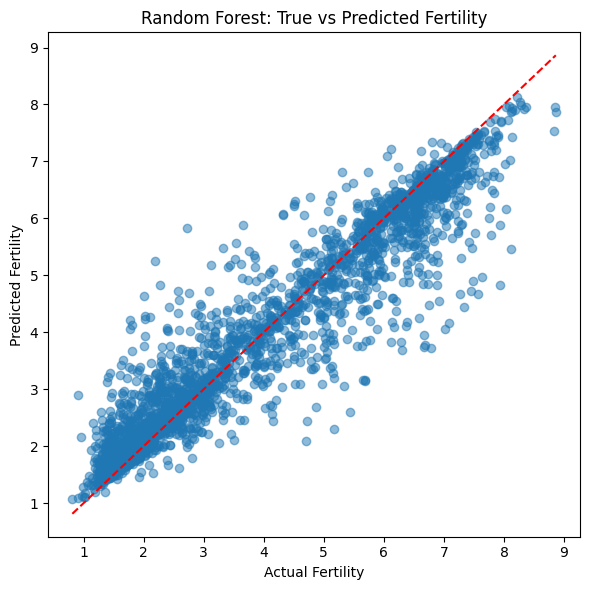

Saved: D:\DS-Project\Demographic-Change_Understanding-Fertility-Through-Data\reports\figures\rf_true_vs_pred.png


In [8]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.xlabel("Actual Fertility")
plt.ylabel("Predicted Fertility")
plt.title("Random Forest: True vs Predicted Fertility")
plt.tight_layout()

save_path_1 = FIGURES_DIR / "rf_true_vs_pred.png"
plt.savefig(save_path_1, dpi=300)
plt.show()

print("Saved:", save_path_1)

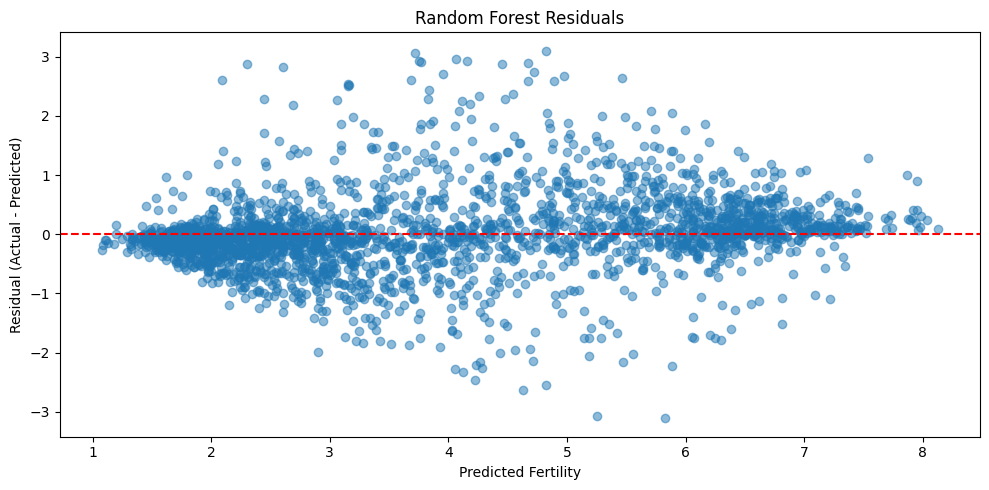

Saved: D:\DS-Project\Demographic-Change_Understanding-Fertility-Through-Data\reports\figures\rf_residuals.png


In [9]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle="--", color="red")
plt.xlabel("Predicted Fertility")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Random Forest Residuals")
plt.tight_layout()

save_path_2 = FIGURES_DIR / "rf_residuals.png"
plt.savefig(save_path_2, dpi=300)
plt.show()

print("Saved:", save_path_2)